In [1]:
# import all necessary libraries

# for file handling
import os
import time
import scipy
import shutil
# reading files under given folder
import glob
# progress bar
import tqdm
import numpy as np
# plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot
# imaging processing
import skimage as ski
# data processing and manipulation
import pandas as pd
import skimage as ski
import tifffile
from IPython.display import clear_output
%matplotlib inline

import trackpy as tp
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
#pd.read_excel('/Project_2/data/Dataset_PartB.xlsx',sheet_name="Run1")

In [3]:
run1=pd.read_excel('/Users/Clarisse/EPFL_MA1/Mechanobio/ME480-Project2/PartB/Dataset_PartB.xlsx',sheet_name="Run1")
run2=pd.read_excel('/Users/Clarisse/EPFL_MA1/Mechanobio/ME480-Project2/PartB/Dataset_PartB.xlsx',sheet_name="Run2")
run3=pd.read_excel('/Users/Clarisse/EPFL_MA1/Mechanobio/ME480-Project2/PartB/Dataset_PartB.xlsx',sheet_name="Run3")
run4=pd.read_excel('/Users/Clarisse/EPFL_MA1/Mechanobio/ME480-Project2/PartB/Dataset_PartB.xlsx',sheet_name="Run4")
run5=pd.read_excel('/Users/Clarisse/EPFL_MA1/Mechanobio/ME480-Project2/PartB/Dataset_PartB.xlsx',sheet_name="Run5")
run6=pd.read_excel('/Users/Clarisse/EPFL_MA1/Mechanobio/ME480-Project2/PartB/Dataset_PartB.xlsx',sheet_name="Run6")
run7=pd.read_excel('/Users/Clarisse/EPFL_MA1/Mechanobio/ME480-Project2/PartB/Dataset_PartB.xlsx',sheet_name="Run7")
run8=pd.read_excel('/Users/Clarisse/EPFL_MA1/Mechanobio/ME480-Project2/PartB/Dataset_PartB.xlsx',sheet_name="Run8")

run_times=[15,19,24,29,35,39,43,48]
run_time_1=[run_times[0] for i in range (0,len(run1))]
run_time_2=[run_times[1] for i in range (0,len(run2))]
run_time_3=[run_times[2] for i in range (0,len(run3))]
run_time_4=[run_times[3] for i in range (0,len(run4))]
run_time_5=[run_times[4] for i in range (0,len(run5))]
run_time_6=[run_times[5] for i in range (0,len(run6))]
run_time_7=[run_times[6] for i in range (0,len(run7))]
run_time_8=[run_times[7] for i in range (0,len(run8))]

run1['run_time']=run_time_1
run2['run_time']=run_time_2
run3['run_time']=run_time_3
run4['run_time']=run_time_4
run5['run_time']=run_time_5
run6['run_time']=run_time_6
run7['run_time']=run_time_7
run8['run_time']=run_time_8



In [16]:
run1

,,Area,Mean,StdDev,Mode,Min,Max,X,Y,XM,...,RawIntDen,Slice,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,run_time
0,1,1548,255.000,0.000,255,255,255,64.477,200.478,64.477,...,394740.0,24,61,174,96.582,38.000,1.375,0.727,0.965,15
1,2,1788,234.320,69.630,255,0,255,57.502,221.805,57.321,...,418965.0,33,53,252,83.660,35.000,1.771,0.565,0.999,15
2,3,1778,246.538,45.687,255,0,255,60.145,45.400,60.035,...,438345.0,34,53,75,81.741,35.000,1.738,0.575,1.000,15
3,4,1590,242.009,56.088,255,0,255,60.765,115.052,60.958,...,384795.0,54,56,142,82.875,34.000,1.618,0.618,1.000,15
4,5,2261,246.541,45.676,255,0,255,60.346,201.976,60.273,...,557430.0,84,56,237,85.170,39.000,1.816,0.551,1.001,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,5572,1427,143.851,126.492,255,0,255,64.193,111.273,65.911,...,205275.0,8124,57,138,81.724,30.415,1.783,0.561,1.001,15
5572,5573,1658,246.695,45.278,255,0,255,56.063,203.369,55.877,...,409020.0,8125,50,230,80.707,37.000,1.495,0.669,1.000,15
5573,5574,1661,246.710,45.238,255,0,255,58.376,32.241,58.288,...,409785.0,8126,54,4,98.276,37.000,1.480,0.676,1.001,15
5574,5575,1797,135.801,127.265,255,0,255,55.921,187.301,54.877,...,244035.0,8127,48,217,79.778,38.000,1.622,0.617,1.003,15


In [4]:
run_data=run1.append([run2,run3,run4,run5,run6,run7,run8])
run_data['Def']=[1-run_data['Circ.'].iloc[i] for i in range (0,len(run_data))]
run_data.to_csv('data/dataB.csv')
run_data.head()

AttributeError: 'DataFrame' object has no attribute 'append'

In [5]:
run_data=pd.read_csv('data/dataB.csv')

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

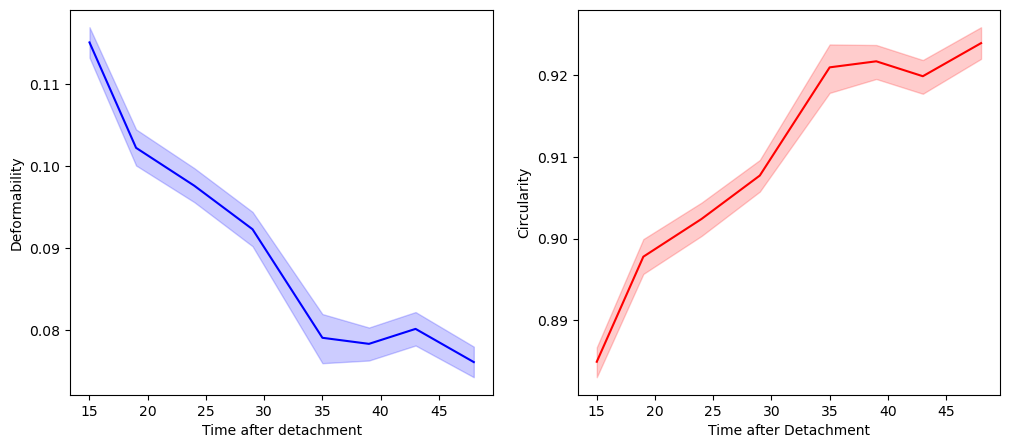

In [10]:
#"Cir.","Area"
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,5))

sns.lineplot(data=run_data,x="run_time",y="Def",ax=axes[0],color='b')
sns.lineplot(data=run_data,x="run_time",y="Circ.",ax=axes[1],color='r')
#sns.lineplot(data=run_data,x="run_time",y="Area",ax=axes[2],color='g')

axes[0].set_xlabel("Time after detachment")
axes[0].set_ylabel("Deformability")

axes[1].set_xlabel("Time after Detachment")
axes[1].set_ylabel("Circularity")

plt.savefig("/Users/Clarisse/Documents/ENS 1  - L3/ENS 2 - M1/Mechanobiology-Group9/Project_2/Figures/PartB.png")

In [38]:
# statistical testing

scipy.stats.kruskal(run1['Circ.'],run2['Circ.'],run3['Circ.'])#,run4['Circ.'],run5['Circ.'],run6['Circ.'],run7['Circ.'],run8['Circ.'])

KruskalResult(statistic=316.89535771375307, pvalue=1.5383225349264217e-69)

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
#run_data.rename({'Circ.:Circ'}, axis='columns')
run_data.rename(columns={"Circ.": "Circ"},inplace=True)



In [49]:
data_lm=ols('Circ ~ run_time ', data=run_data).fit() 
print(sm.stats.anova_lm(data_lm, typ=1))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
               df      sum_sq   mean_sq            F         PR(>F)
run_time      1.0    5.735645  5.735645  1229.451342  2.203271e-264
Residual  32336.0  150.854134  0.004665          NaN            NaN


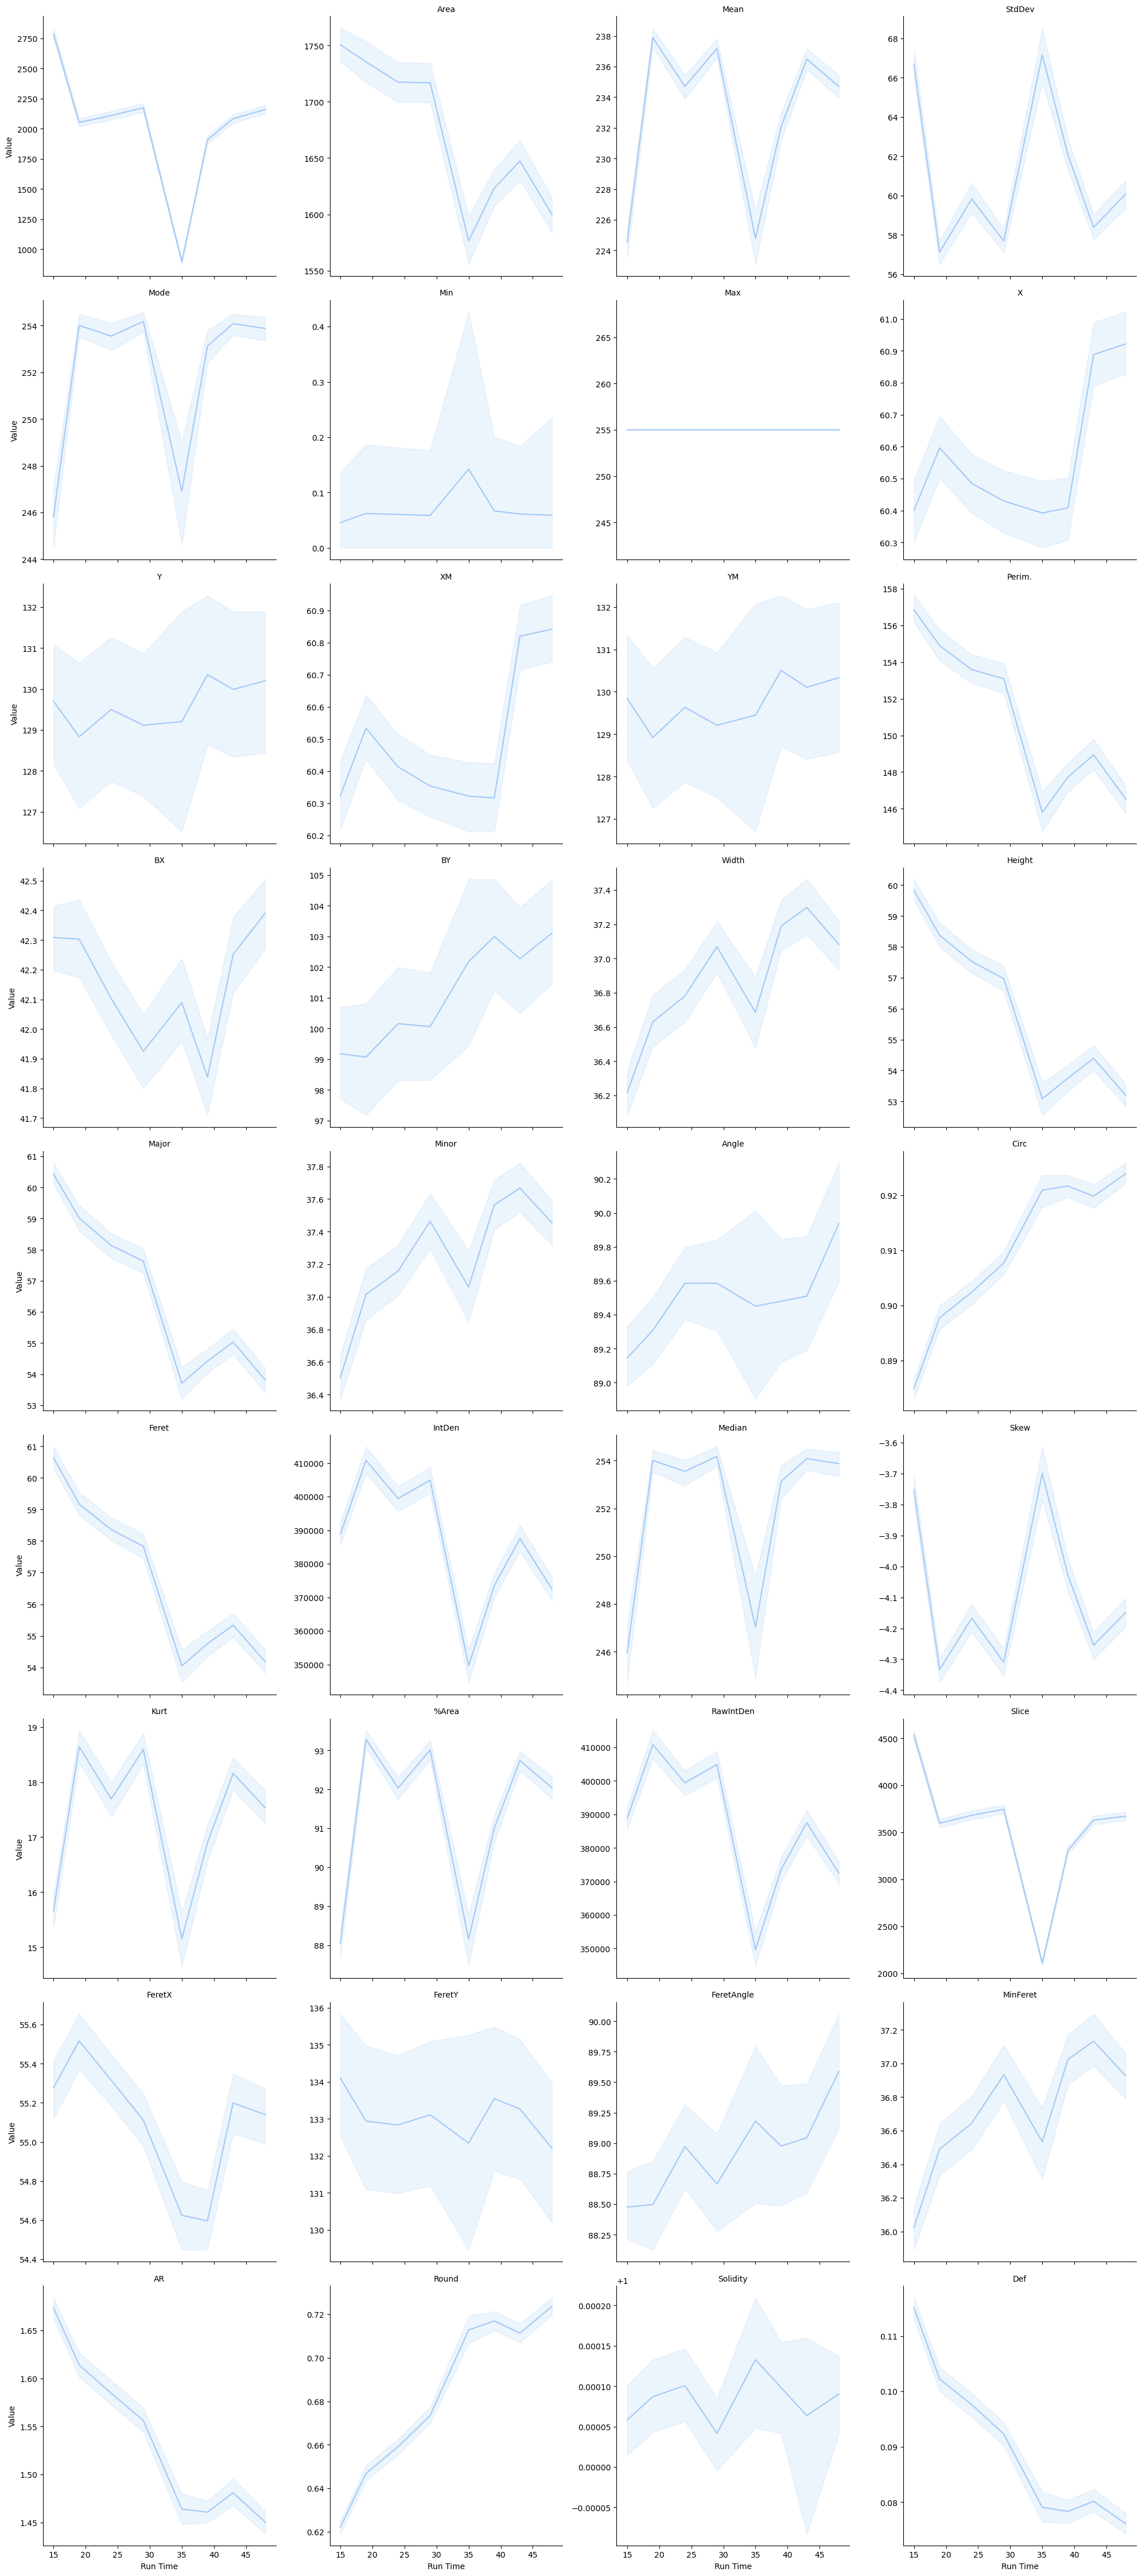

<Figure size 640x480 with 0 Axes>

In [59]:

# Melt the DataFrame to convert it to long format
df_long = pd.melt(run_data, id_vars=['run_time'], var_name='parameter', value_name='value')

# Create a FacetGrid
g = sns.FacetGrid(df_long, col='parameter', col_wrap=4, height=5, sharey=False)

# Map line plots onto the FacetGrid
g.map(sns.lineplot, 'run_time', 'value')

# Set the x-axis label
g.set_xlabels('Run Time')

# Set the y-axis label
g.set_ylabels('Value')

# Optionally, you can add more customization to the plot, such as titles for each subplot
g.set_titles(col_template='{col_name}')

# Show the plot
plt.show()


plt.savefig("/Users/Clarisse/Documents/ENS 1  - L3/ENS 2 - M1/Mechanobiology-Group9/Project_2/Figures/PartB__metrics.png")